In [109]:
import pandas as pd
import eli5
import numpy as np
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [110]:
train_file = 'train_set.csv'
test_file = 'test_set.csv'

data = pd.read_csv(train_file)
train_x, train_y = data.drop(['ID', 'y'], axis=1), data['y']
test_x = pd.read_csv(test_file)

In [111]:
train_x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,43,management,married,tertiary,no,291,yes,no,unknown,9,may,150,2,-1,0,unknown
1,42,technician,divorced,primary,no,5076,yes,no,cellular,7,apr,99,1,251,2,other
2,47,admin.,married,secondary,no,104,yes,yes,cellular,14,jul,77,2,-1,0,unknown
3,28,management,single,secondary,no,-994,yes,yes,cellular,18,jul,174,2,-1,0,unknown
4,42,technician,divorced,secondary,no,2974,yes,no,unknown,21,may,187,5,-1,0,unknown


In [112]:
def label_encoding(df_data, is_scale=False):
    try:
        data = df_data.copy()
        cat_cols = data.select_dtypes(['category']).columns
        if len(cat_cols) == 0:
            cat_cols = data.select_dtypes(exclude=['number']).columns
            data[cat_cols] = data[cat_cols].astype('category')
        data[cat_cols] = data[cat_cols].apply(lambda x: x.cat.codes)
        if is_scale:
            # standarizing 
            data = scale(data)
        return data
    except:
        raise Exception('Label encoding error')

In [113]:
cols = train_x.select_dtypes(exclude=['number']).columns
train_x[cols] = train_x[cols].astype('category')

In [114]:
params = {
    'max_bin':512,
    'learning_rate':0.01,
    'boosting_type':'gbdt',
    'objective':'binary',
    'is_unbalance':True,
    'metric':'auc',
    'importance_type':'gain',
    'num_leaves':'30',
    'random_state':42,
    'verbose':-1
}

x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.8, random_state=42)
train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test, reference=train_data)

lgb_model = lgb.train(params, train_data, num_boost_round=1000, valid_sets=test_data, 
                     categorical_feature=['job', 'marital', 'education', 'default', 'housing',
                                         'loan', 'contact', 'month', 'poutcome'])

/home/xma/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:1188: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['contact', 'default', 'education', 'housing', 'job', 'loan', 'marital', 'month', 'poutcome']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/home/xma/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:1188: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['contact', 'default', 'education', 'housing', 'job', 'loan', 'marital', 'month', 'poutcome']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/home/xma/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:742: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[1]	valid_0's auc: 0.867534
[2]	valid_0's auc: 0.89423
[3]	valid_0's auc: 0.893402
[4]	valid_0's auc: 0.894003
[5]	valid_0's auc: 0.893664
[6]	valid_0's auc: 0.894171
[7]	valid_0's auc: 0.896816
[8]	valid_0's auc: 0.898408
[9]	valid_0's auc: 0.898642
[10]	valid_0's auc: 0.899706
[11]	valid_0's auc: 0.900656
[12]	valid_0's auc: 0.901055
[13]	valid_0's auc: 0.902539
[14]	valid_0's auc: 0.903587
[15]	valid_0's auc: 0.904098
[16]	valid_0's auc: 0.904507
[17]	valid_0's auc: 0.905652
[18]	valid_0's auc: 0.906348
[19]	valid_0's auc: 0.906386
[20]	valid_0's auc: 0.906262
[21]	valid_0's auc: 0.906445
[22]	valid_0's auc: 0.906267
[23]	valid_0's auc: 0.906543
[24]	valid_0's auc: 0.906096
[25]	valid_0's auc: 0.906222
[26]	valid_0's auc: 0.906292
[27]	valid_0's auc: 0.906519
[28]	valid_0's auc: 0.906623
[29]	valid_0's auc: 0.906724
[30]	valid_0's auc: 0.906813
[31]	valid_0's auc: 0.906822
[32]	valid_0's auc: 0.906651
[33]	valid_0's auc: 0.906482
[34]	valid_0's auc: 0.906609
[35]	valid_0's auc: 0.90

[373]	valid_0's auc: 0.92203
[374]	valid_0's auc: 0.922032
[375]	valid_0's auc: 0.92202
[376]	valid_0's auc: 0.922013
[377]	valid_0's auc: 0.922046
[378]	valid_0's auc: 0.922032
[379]	valid_0's auc: 0.922047
[380]	valid_0's auc: 0.922053
[381]	valid_0's auc: 0.922089
[382]	valid_0's auc: 0.922121
[383]	valid_0's auc: 0.922153
[384]	valid_0's auc: 0.922145
[385]	valid_0's auc: 0.922157
[386]	valid_0's auc: 0.922192
[387]	valid_0's auc: 0.922216
[388]	valid_0's auc: 0.922247
[389]	valid_0's auc: 0.922265
[390]	valid_0's auc: 0.922284
[391]	valid_0's auc: 0.922313
[392]	valid_0's auc: 0.922321
[393]	valid_0's auc: 0.922348
[394]	valid_0's auc: 0.922345
[395]	valid_0's auc: 0.922367
[396]	valid_0's auc: 0.922342
[397]	valid_0's auc: 0.92236
[398]	valid_0's auc: 0.922388
[399]	valid_0's auc: 0.922365
[400]	valid_0's auc: 0.922381
[401]	valid_0's auc: 0.922391
[402]	valid_0's auc: 0.922398
[403]	valid_0's auc: 0.922415
[404]	valid_0's auc: 0.922435
[405]	valid_0's auc: 0.922445
[406]	valid_0

[772]	valid_0's auc: 0.921436
[773]	valid_0's auc: 0.921436
[774]	valid_0's auc: 0.921431
[775]	valid_0's auc: 0.921423
[776]	valid_0's auc: 0.921405
[777]	valid_0's auc: 0.9214
[778]	valid_0's auc: 0.921397
[779]	valid_0's auc: 0.9214
[780]	valid_0's auc: 0.921395
[781]	valid_0's auc: 0.921387
[782]	valid_0's auc: 0.921389
[783]	valid_0's auc: 0.921385
[784]	valid_0's auc: 0.921389
[785]	valid_0's auc: 0.9214
[786]	valid_0's auc: 0.92138
[787]	valid_0's auc: 0.921367
[788]	valid_0's auc: 0.921395
[789]	valid_0's auc: 0.921397
[790]	valid_0's auc: 0.921389
[791]	valid_0's auc: 0.921369
[792]	valid_0's auc: 0.921341
[793]	valid_0's auc: 0.921343
[794]	valid_0's auc: 0.921337
[795]	valid_0's auc: 0.921325
[796]	valid_0's auc: 0.9213
[797]	valid_0's auc: 0.921328
[798]	valid_0's auc: 0.921326
[799]	valid_0's auc: 0.921319
[800]	valid_0's auc: 0.921312
[801]	valid_0's auc: 0.921287
[802]	valid_0's auc: 0.921285
[803]	valid_0's auc: 0.92129
[804]	valid_0's auc: 0.921294
[805]	valid_0's auc:

In [115]:
roc_auc_score(y_test, lgb_model.predict(x_test))

0.9212428680492338

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def plotImp(model, X , num = 20):
    feature_imp = pd.DataFrame(sorted(zip(model.feature_importance(),X.columns)), 
                               columns=['Value','Feature'])
    plt.figure(figsize=(40, 20))
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.show()

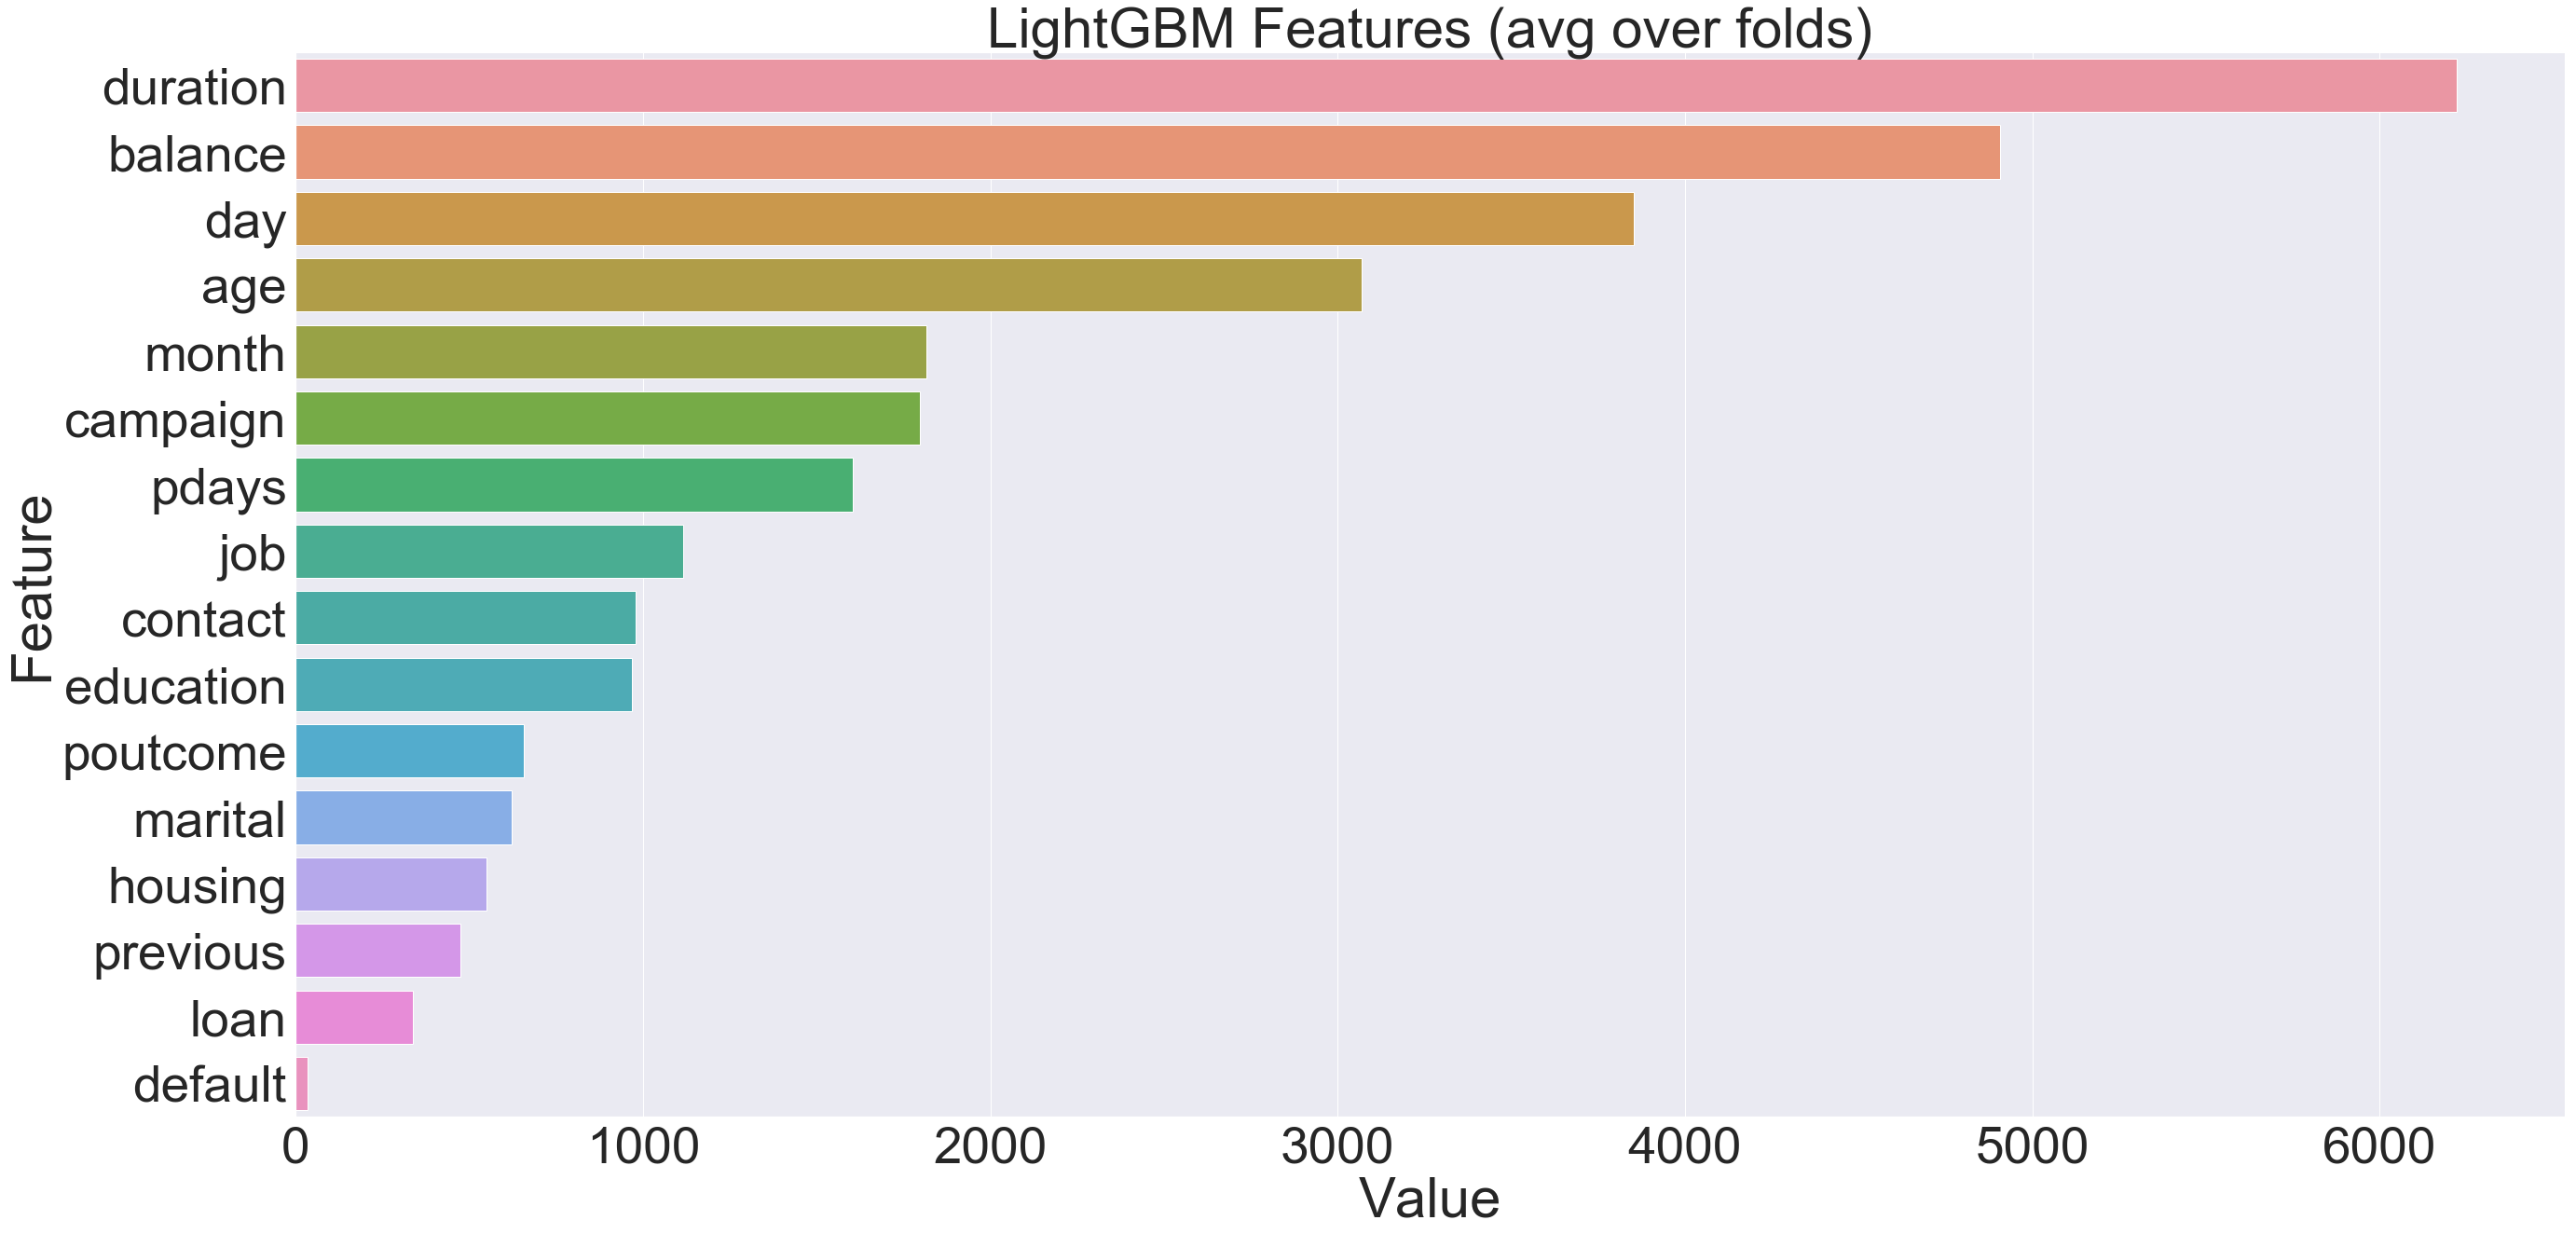

In [117]:
plotImp(lgb_model, train_x)

In [118]:
train_x.describe()

,age,balance,day,duration,campaign,pdays,previous
count,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000
mean,40.935379,1357.555082,15.835289,257.732393,2.772050,40.248766,0.591737
std,10.634289,2999.822811,8.319480,256.975151,3.136097,100.213541,2.568313
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,181.000000,2.000000,-1.000000,0.000000
75%,48.000000,1435.000000,21.000000,317.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,3881.000000,55.000000,854.000000,275.000000


In [119]:
b_max, b_min, b_mean, b_median = train_x['balance'].mean(), train_x['balance'].min(), train_x['balance'].mean(), train_x['balance'].median()
train_x['b_max'] = train_x['balance'] - b_max
train_x['b_min'] = train_x['balance'] - b_min
train_x['b_mena'] = train_x['balance'] - b_mean
train_x['b_median'] = train_x['balance'] - b_median

In [120]:
train_x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,b_max,b_min,b_mena,b_median
0,43,management,married,tertiary,no,291,yes,no,unknown,9,may,150,2,-1,0,unknown,-1066.555082,8310,-1066.555082,-157.0
1,42,technician,divorced,primary,no,5076,yes,no,cellular,7,apr,99,1,251,2,other,3718.444918,13095,3718.444918,4628.0
2,47,admin.,married,secondary,no,104,yes,yes,cellular,14,jul,77,2,-1,0,unknown,-1253.555082,8123,-1253.555082,-344.0
3,28,management,single,secondary,no,-994,yes,yes,cellular,18,jul,174,2,-1,0,unknown,-2351.555082,7025,-2351.555082,-1442.0
4,42,technician,divorced,secondary,no,2974,yes,no,unknown,21,may,187,5,-1,0,unknown,1616.444918,10993,1616.444918,2526.0


In [121]:
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.8, random_state=42)
train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test, reference=train_data)

lgb_model = lgb.train(params, train_data, num_boost_round=1000, valid_sets=test_data, 
                     categorical_feature=['job', 'marital', 'education', 'default', 'housing',
                                         'loan', 'contact', 'month', 'poutcome'])

/home/xma/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:1188: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['contact', 'default', 'education', 'housing', 'job', 'loan', 'marital', 'month', 'poutcome']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/home/xma/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:1188: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['contact', 'default', 'education', 'housing', 'job', 'loan', 'marital', 'month', 'poutcome']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/home/xma/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:742: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[1]	valid_0's auc: 0.86753
[2]	valid_0's auc: 0.894227
[3]	valid_0's auc: 0.893401
[4]	valid_0's auc: 0.89411
[5]	valid_0's auc: 0.893661
[6]	valid_0's auc: 0.894165
[7]	valid_0's auc: 0.896812
[8]	valid_0's auc: 0.8984
[9]	valid_0's auc: 0.898638
[10]	valid_0's auc: 0.899706
[11]	valid_0's auc: 0.900731
[12]	valid_0's auc: 0.901101
[13]	valid_0's auc: 0.902577
[14]	valid_0's auc: 0.903644
[15]	valid_0's auc: 0.904186
[16]	valid_0's auc: 0.904527
[17]	valid_0's auc: 0.905238
[18]	valid_0's auc: 0.906396
[19]	valid_0's auc: 0.906436
[20]	valid_0's auc: 0.906303
[21]	valid_0's auc: 0.906495
[22]	valid_0's auc: 0.906305
[23]	valid_0's auc: 0.906552
[24]	valid_0's auc: 0.906121
[25]	valid_0's auc: 0.906233
[26]	valid_0's auc: 0.906311
[27]	valid_0's auc: 0.906549
[28]	valid_0's auc: 0.906635
[29]	valid_0's auc: 0.906292
[30]	valid_0's auc: 0.906412
[31]	valid_0's auc: 0.906508
[32]	valid_0's auc: 0.906437
[33]	valid_0's auc: 0.906473
[34]	valid_0's auc: 0.906619
[35]	valid_0's auc: 0.90660

[372]	valid_0's auc: 0.922298
[373]	valid_0's auc: 0.922328
[374]	valid_0's auc: 0.922302
[375]	valid_0's auc: 0.922278
[376]	valid_0's auc: 0.922296
[377]	valid_0's auc: 0.922296
[378]	valid_0's auc: 0.922282
[379]	valid_0's auc: 0.922304
[380]	valid_0's auc: 0.92233
[381]	valid_0's auc: 0.922373
[382]	valid_0's auc: 0.922359
[383]	valid_0's auc: 0.922379
[384]	valid_0's auc: 0.922413
[385]	valid_0's auc: 0.922393
[386]	valid_0's auc: 0.922437
[387]	valid_0's auc: 0.922423
[388]	valid_0's auc: 0.922449
[389]	valid_0's auc: 0.922416
[390]	valid_0's auc: 0.922443
[391]	valid_0's auc: 0.922459
[392]	valid_0's auc: 0.922485
[393]	valid_0's auc: 0.922471
[394]	valid_0's auc: 0.922476
[395]	valid_0's auc: 0.922492
[396]	valid_0's auc: 0.922536
[397]	valid_0's auc: 0.922538
[398]	valid_0's auc: 0.922552
[399]	valid_0's auc: 0.922568
[400]	valid_0's auc: 0.922603
[401]	valid_0's auc: 0.922621
[402]	valid_0's auc: 0.922636
[403]	valid_0's auc: 0.922648
[404]	valid_0's auc: 0.922651
[405]	valid

[687]	valid_0's auc: 0.921889
[688]	valid_0's auc: 0.921883
[689]	valid_0's auc: 0.921892
[690]	valid_0's auc: 0.921883
[691]	valid_0's auc: 0.921877
[692]	valid_0's auc: 0.921878
[693]	valid_0's auc: 0.921877
[694]	valid_0's auc: 0.921858
[695]	valid_0's auc: 0.921864
[696]	valid_0's auc: 0.921856
[697]	valid_0's auc: 0.921856
[698]	valid_0's auc: 0.921848
[699]	valid_0's auc: 0.921836
[700]	valid_0's auc: 0.921838
[701]	valid_0's auc: 0.921836
[702]	valid_0's auc: 0.921833
[703]	valid_0's auc: 0.921823
[704]	valid_0's auc: 0.921802
[705]	valid_0's auc: 0.921791
[706]	valid_0's auc: 0.921833
[707]	valid_0's auc: 0.921832
[708]	valid_0's auc: 0.921851
[709]	valid_0's auc: 0.921844
[710]	valid_0's auc: 0.921852
[711]	valid_0's auc: 0.921862
[712]	valid_0's auc: 0.921848
[713]	valid_0's auc: 0.921849
[714]	valid_0's auc: 0.921846
[715]	valid_0's auc: 0.92184
[716]	valid_0's auc: 0.921844
[717]	valid_0's auc: 0.921847
[718]	valid_0's auc: 0.921833
[719]	valid_0's auc: 0.921849
[720]	valid

In [122]:
roc_auc_score(y_test, lgb_model.predict(x_test))

0.9210052738118875